# EDA test notebook

In [20]:
# import required packages
import os

import pandas as pd
import math
from functions import *

import matplotlib.pyplot as plt

In [21]:
# function to load most shared articles for eda
def load_most_shared_eda(dir_path):
#     'data/most_popular'
    directory = os.fsencode(dir_path)
    
    files = []
    most_shared_df = pd.DataFrame()
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        exclude = 'before'
        if filename.endswith('.csv') and exclude not in filename :
            files.append(filename)
            
    #read them into pandas
    df_list = [pd.read_csv(dir_path+'/'+file) for file in files]
    
    return df_list

In [22]:
# fucntion to clean most shared articles for eda
def clean_most_shared_eda(df_list):
    
    for df in df_list:
        df.date_published = df.date_published.apply(lambda x: pd.to_datetime(x).date())
        df.date_sourced = df.date_sourced.apply(lambda x: pd.to_datetime(x).date())
        df.set_index('date_sourced', inplace=True)
        df.sort_index(ascending=False, inplace=True)
    df_list.sort(key=lambda x: x.index[0])
    return df_list
    

In [23]:
# generate a grid of subplots that fits legnth of list, plot dataframes in list
def plot_most_shared(list_df):
    
    size = len(list_df)
    cols = round(math.sqrt(size))
    rows = cols
    while rows * cols < size:
        rows += 1
    f, ax_arr = plt.subplots(rows, cols)
    plt.rcParams["figure.figsize"] = (20,20)
    ax_arr = ax_arr.reshape(-1)
    for i in range(len(ax_arr)):
        if i >= size:
            ax_arr[i].axis('off')
            break

        list_df[i].groupby('date_published').count().plot(kind='bar', 
                                                          title=f'Date Sourced: {str(df_list[i].index[1])}', 
                                                          rot=50, xlabel='Date Published', 
                                                          ylabel='Number of Articles', ax=ax_arr[i]);
        ax_arr[i].legend(['Articles'])
        
#     plt.subplot_tool();

In [25]:
pd.to_datetime('12/01/10').date()

datetime.date(2010, 12, 1)

In [14]:
df_list_load = load_most_shared_eda('data/most_popular_train')
df_list = clean_most_shared_eda(df_list_load)

In [15]:
# df_list = df_list.sort(key=lambda x: x.index[0])

In [16]:
# df_list.sort(key=lambda x: x.index[0])

In [17]:
# df_list

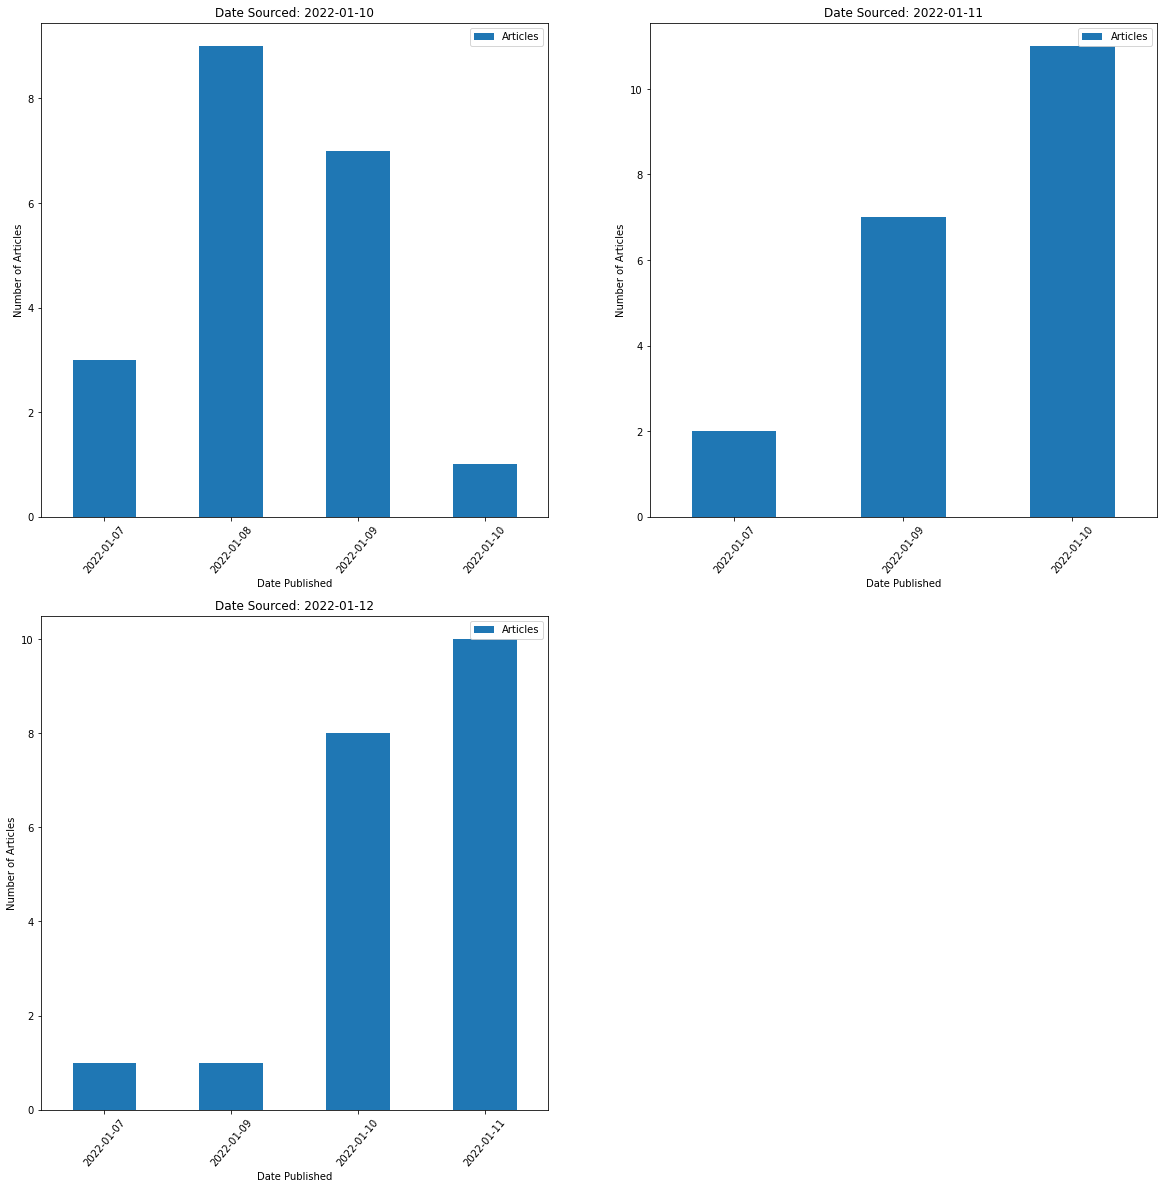

In [19]:
plot_most_shared(df_list)

In [78]:
len(df_list)

3

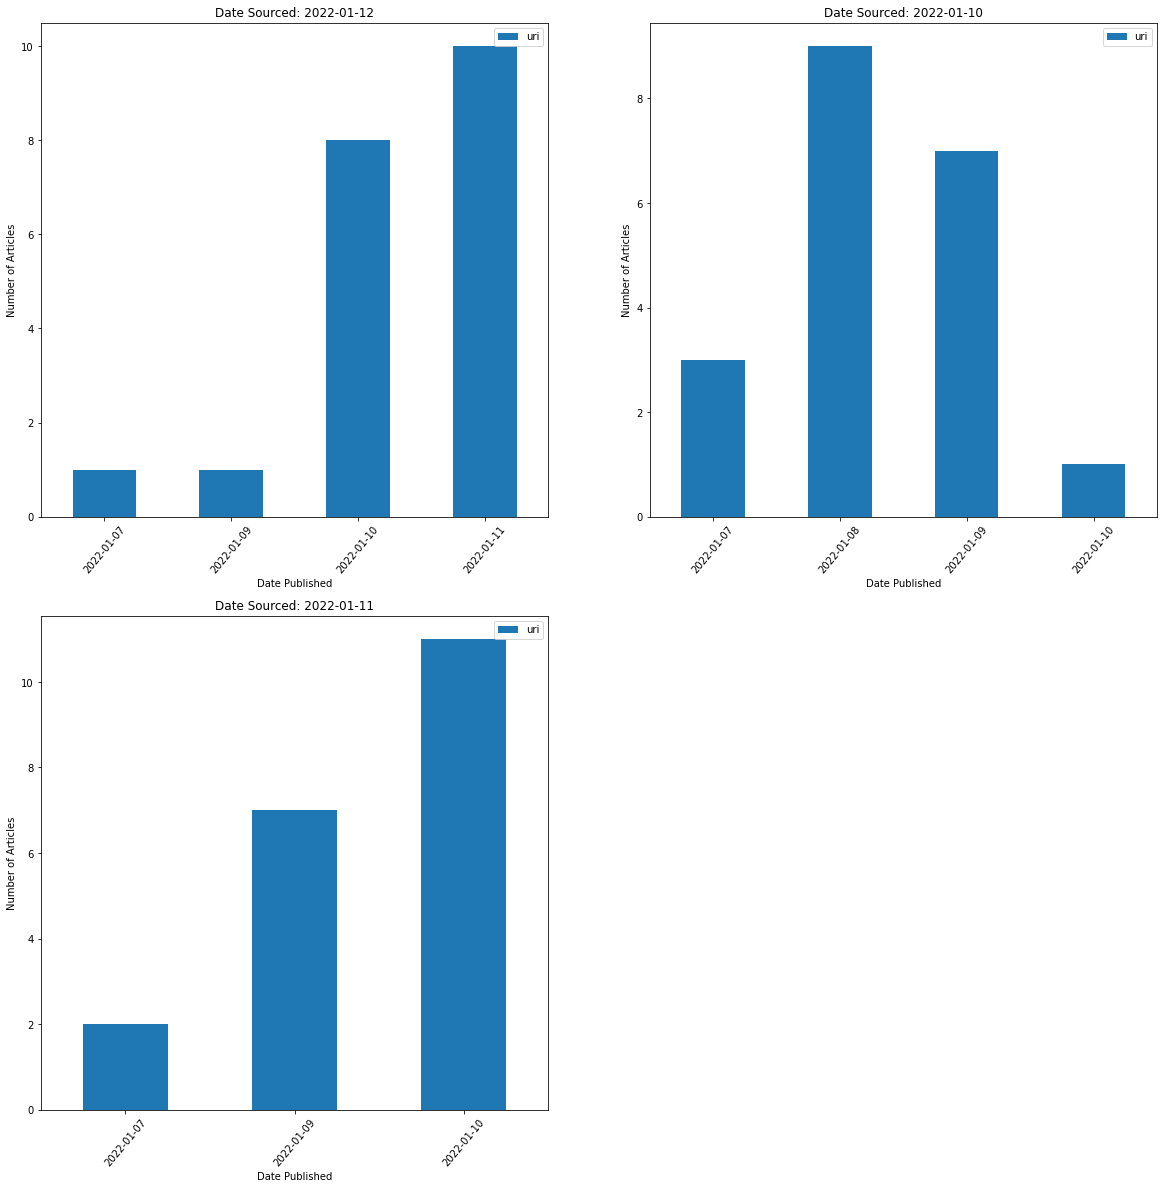

In [81]:
size = len(df_list)
cols = round(math.sqrt(size))
rows = cols
while rows * cols < size:
    rows += 1
f, ax_arr = plt.subplots(rows, cols)
plt.rcParams["figure.figsize"] = (20,20)
ax_arr = ax_arr.reshape(-1)
for i in range(len(ax_arr)):
    if i >= size:
        ax_arr[i].axis('off')
        break
        
    df_list[i].groupby('date_published').count().plot(kind='bar', 
                                                      title=f'Date Sourced: {str(df_list[i].index[1])}', 
                                                      rot=50, xlabel='Date Published', 
                                                      ylabel='Number of Articles', ax=ax_arr[i]);
# plt.subplot_tool();

In [2]:
df = pd.read_csv('data/archive_train.csv')
df.dropna(inplace=True)

df_most_shared = load_most_shared('data/most_popular_train')
df.date_published = df.date_published.apply(lambda x: pd.to_datetime(x).date())

In [3]:
popular_list = df_most_shared.uri.values
df['popular'] = [1 if x in popular_list else 0 for x in df['uri']]

In [4]:
df.head()

,uri,date_published,headline,keywords,snippet,word_count,popular
0,nyt://article/4e2abcbc-9563-56c0-bf18-c93ce4e7...,2021-12-01,let’s end the covid blame games,coronavirus omicron variantcoronavirus (2019-n...,"Finger pointing is pointless, divisive and dumb.",918,0
1,nyt://article/f7a5e7ef-e4cd-575c-a0e1-ff4d18d5...,2021-12-01,trump’s iran policy has become a disaster for ...,irannuclear weaponsembargoes and sanctionsunit...,Withdrawing from the Iran nuclear deal was a m...,1560,0
2,nyt://article/778af86c-b600-5aeb-be98-0a9a1aa1...,2021-12-01,this extinct eagle may have gulped guts like a...,eagles (birds)vultures (birds)condorsendangere...,Scientists suggest the largest eagle that ever...,913,0
3,nyt://article/fb7763c2-0f41-5c81-9ecf-17607ba5...,2021-12-01,republican recriminations point to a rocky pat...,republican partyhouse of representativesboeber...,Simmering tensions between the far-right flank...,1172,0
4,nyt://article/ba0afd37-0c00-5535-8868-21130e28...,2021-12-01,a times editor who attended oxford recalls a d...,school shootings and armed attacks,Three teenage students were killed on Tuesday ...,309,0
